### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import requests
import os
import tweepy
import re
import json
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

# Data Gathering
  ### 1. CSV File

In [2]:
df_archive =pd.read_csv('twitter_archive_enhanced.csv')

### 2. TSV File - Programmatically

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name=url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name,'wb') as f:
        f.write(response.content)
df_ip=pd.read_csv('image-predictions.tsv',sep='\t')


### 3. Twitter API Data

In [24]:
consumer_key = 'XXXX...'
consumer_secret = 'XXXX...'
access_token = 'XXXX...'
access_secret = 'XXXX...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [25]:
exp_tweet = api.get_status(df_archive.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
content

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016',
 'id': 747963614829678593,
 'id_str': '747963614829678593',
 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q',
 'truncated': False,
 'display_text_range': [0, 70],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 747963600220917761,
    'id_str': '747963600220917761',
    'indices': [71, 94],
    'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'url': 'https://t.co/ZPfeRtOX0Q',
    'display_url': 'pic.twitter.com/ZPfeRtOX0Q',
    'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 937, 'h': 632, 'resize': 'fit'},
     'small': {'w': 680, 'h': 459, 'resize': 'fit'},
     'large': {'w': 937, 'h': 632, '

In [27]:
errors = []
if not os.path.isfile('tweet_json.txt'):
    with open ('tweet_json.txt','w') as file:
        for tweet_id in df_archive['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print ("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)

Error on tweet id 888202515573088257;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 873697596434513921;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872668790621863937;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872261713294495745;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 869988702071779329;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 866816280283807744;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 861769973181624320;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 856602993587888130;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 851953902622658560;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 845459076796616705;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 844704788403

In [4]:
df_list=[]
with open ('tweet_json.txt','r')as file:
    for line in file:
        tweet = json.loads(line)
        df_list.append(tweet)
api_df =pd.DataFrame(df_list)
api_df = api_df[['id','retweet_count','favorite_count']]

# Data Assessing

## Quality Issues
#### In df_archive
- Retweets should be dropped
- Remove columns in_reply_to_status_id, in_reply_to_user_id 
- Timestamp is not in datetime
- Some Items in Name,doggo, floofer, pupper,puppo are None not NaN
- Urls are written twice in expanded_url
- Some expanded urls are missing
- Remove html code from source/ use more descriptive names
- In the rating_denominator there are different values than 10, Either People posting for more than one dog as an accumulative or one that wrote something not related to the dog entirely
- Problems with nominators, some have wrong ratings, the ratings are wrong and 
- (new issue after making changes) changing of ratings has lead to them being of the type float, they need to be changed to int
- Other words have been used for floofer e.g. archive_clean['433']
- names 'a', 'an' and 'the' to NaN

#### In df_ip
- Remove row if p1_dog, p2_dog and p3_dog are false 
- Remove duplicates jpg_url
- Drop img_num
- Names of the columns are not clear



## Tidiness Issues
- Doggo, Floofer, Pupper, Puppo should be in one Column
- Multiple Breed predictions might be confusing
- All the three Dfs should be combined in one dataframe


In [5]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
df_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2118,670420569653809152,NaN,NaN,2015-11-28 01:54:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Damon. The newest presidential candida...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670420569...,10,10,Damon,None,None,None,None


In [9]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_archive.shape

(2356, 17)

In [12]:
df_archive.query("name!='None'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


In [13]:
df_archive.query("rating_numerator == 75")['text']

340    RT @dog_rates: This is Logan, the Chow who liv...
695    This is Logan, the Chow who lived. He solemnly...
Name: text, dtype: object

In [14]:
df_archive[df_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
sum(df_archive.doggo.isnull())

0

In [16]:
df_archive.rating_denominator.unique()
df_denominator = df_archive[df_archive['rating_denominator']!=10 ]

In [17]:
df_archive.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Tucker          10
Penny           10
Lola            10
Bo               9
Winston          9
the              8
Sadie            8
Toby             7
Buddy            7
Bailey           7
Daisy            7
an               7
Leo              6
Scout            6
Jax              6
Jack             6
Rusty            6
Oscar            6
Milo             6
Bella            6
Stanley          6
Dave             6
Koda             6
Gus              5
              ... 
Pluto            1
Colin            1
Striker          1
Meera            1
Anna             1
Adele            1
Mutt             1
Ulysses          1
Chubbs           1
Alf              1
Crumpet          1
Shakespeare      1
Ben              1
Mack             1
Rontu            1
Gustav           1
Devón            1
Sobe             1
Pepper           1
General          1
Molly            1
Sully       

In [18]:
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df_ip.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [20]:
df_ip.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1701,817120970343411712,https://pbs.twimg.com/media/C1b_LSYUsAAJ494.jpg,1,Saluki,0.568809,True,Afghan_hound,0.229352,True,golden_retriever,0.157130,True
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,0.002115,False
1933,859607811541651456,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,0.019285,True
665,682750546109968385,https://pbs.twimg.com/media/CXmd_bsWkAEEXck.jpg,1,English_setter,0.947198,True,English_springer,0.031128,True,Brittany_spaniel,0.005512,True
1649,809084759137812480,https://pbs.twimg.com/media/CzpyM41UoAE1b2w.jpg,1,vizsla,0.911412,True,bloodhound,0.017134,True,Labrador_retriever,0.011761,True
565,678278586130948096,https://pbs.twimg.com/media/CWm6xySUEAAqfFU.jpg,1,Maltese_dog,0.897841,True,Lhasa,0.035717,True,Tibetan_terrier,0.017107,True
233,670420569653809152,https://pbs.twimg.com/media/CU3P82RWEAAIVrE.jpg,1,bow_tie,0.268759,False,cardigan,0.153957,False,wig,0.072295,False
673,683357973142474752,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,1,Pembroke,0.406509,True,Cardigan,0.154854,True,Siberian_husky,0.136366,True
1989,872967104147763200,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,2,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True
458,674788554665512960,https://pbs.twimg.com/media/CV1Um8vWIAAmhQn.jpg,1,miniature_poodle,0.349561,True,toy_poodle,0.154711,True,Maltese_dog,0.134229,True


In [21]:
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_ip.shape

(2075, 12)

In [23]:
df_ip[df_ip.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [24]:
df_ip.query('p1 =="African_crocodile"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
446,674664755118911488,https://pbs.twimg.com/media/CVzkA7-WsAAcXz6.jpg,1,African_crocodile,0.330625,False,American_alligator,0.075356,False,mink,0.057481,False


In [25]:
api_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7426,35172
1,892177421306343426,5519,30447
2,891815181378084864,3645,22896
3,891689557279858688,7597,38463
4,891327558926688256,8178,36729


In [26]:
api_df.tail()

,id,retweet_count,favorite_count
2326,666049248165822465,38,94
2327,666044226329800704,122,262
2328,666033412701032449,39,107
2329,666029285002620928,41,118
2330,666020888022790149,445,2337


In [27]:
api_df.sample()

,id,retweet_count,favorite_count
463,815745968457060357,4060,0


In [28]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [29]:
api_df.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2608.688117,7348.036465
std,6.823170e+16,4413.625859,11412.551936
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,529.000000,1276.000000
50%,7.182469e+17,1218.000000,3189.000000
75%,7.986692e+17,3028.500000,8993.000000
max,8.924206e+17,74941.000000,151396.000000


In [30]:
api_df.id.duplicated().sum()

0

# Cleaning

In [36]:
archive_clean = df_archive.copy()
ip_clean = df_ip.copy()
api_clean = api_df.copy()

In [37]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [38]:
ip_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [39]:
api_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,7426,35172
1,892177421306343426,5519,30447
2,891815181378084864,3645,22896
3,891689557279858688,7597,38463
4,891327558926688256,8178,36729


## Quality Issues
### In df_archive

#### Issue
Retweets should be dropped

#### Define
Tweets with values in retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are retweets and should be dropped


In [40]:
retweets = archive_clean.text.str.match('^RT @')

archive_clean = archive_clean[~retweets]

In [41]:
#Test
sum(archive_clean.retweeted_status_id.notna())

0

In [42]:
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [43]:
#Test
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Issue
remove columns in_reply_to_status_id,in_reply_to_user_id

#### Define
Drop the two columns as they are not important for our analysis

In [44]:
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [45]:
#Test
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Issue
Timestamp is not in datetime

#### Define
Replace datatype as datetime with to_datetime

In [46]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

In [47]:
#Test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB


#### Issue
Some Items in Name,doggo, floofer, pupper,puppo are None not NaN

#### Define
replace None with NaN values

In [48]:
archive_clean.name = archive_clean['name'].replace('None', np.nan, regex=True)
archive_clean['doggo'] = archive_clean['doggo'].replace('None', np.nan, regex=True)
archive_clean.floofer = archive_clean['floofer'].replace('None', np.nan, regex=True)
archive_clean['pupper'] = archive_clean['pupper'].replace('None', np.nan, regex=True)
archive_clean['puppo'] = archive_clean['puppo'].replace('None', np.nan, regex=True)

In [49]:
#Test
sum(archive_clean.floofer.isnull())
archive_clean.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN


#### Issue
urls are written twice in expanded_url

#### Define

split by the comma and only use the first value

In [50]:
archive_clean['expanded_urls'] = archive_clean['expanded_urls'].str.split(',').str[0]

In [51]:
#Test
archive_clean['expanded_urls'][20]

'https://twitter.com/dog_rates/status/888078434458587136/photo/1'

#### Issue
some expanded urls are missing

#### Define
add the missing urls using the tweet id

In [52]:
def add_urls(row):
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        tweet_id = row['tweet_id']
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        return row

archive_clean = archive_clean.apply(add_urls, axis=1)

In [53]:
#Test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 300.9+ KB


#### Issue
remove html code from source/ use more descriptive names

#### Define 
use a for loop to replace with descriptive values

In [54]:
archive_clean.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [55]:
for x in archive_clean.source:
    if x == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        archive_clean.source = archive_clean.source.replace(x, 'Twitter for iPhone')
    elif x== '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        archive_clean.source = archive_clean.source.replace(x, 'Twitter Web Client')
    elif x == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        archive_clean.source = archive_clean.source.replace(x, 'Vine')
    elif x == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
        archive_clean.source = archive_clean.source.replace(x, 'TweetDeck')

In [56]:
#Test
archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine', 'TweetDeck'], dtype=object)

#### Issue 1
In the rating_denominator there are different values than 10, Either People posting for more than one dog as an accumulative or one that wrote something not related to the dog entirely

#### Issue 2
problems with numerators, some have wrong ratings

#### Define
This will need manual cleaning so we will do it for one example, because the rating numerators and denominator depend on one another we will solve both issues in one code.
I also added a programmatic approach, based on this, but it might not be 100% accurate.

In [57]:
archive_clean.rating_denominator.unique()

array([ 10,   0,  15,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

#For Info
archive_clean.query(" rating_denominator != 10")

Example for 1843:
1. Check the text for a rating --> we see that there is a rating and the mention of multiple dogs
2. Check the images to determine how many dogs there are --> we see 8 dogs
3. devide the rating_denominator by 8 
4. Now we also need to divide the rating_numerator by 8
--> we have a accepted rating now

In [58]:
archive_clean.text[1843]

'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'

In [59]:
archive_clean['expanded_urls'][1843]

'https://twitter.com/dog_rates/status/675853064436391936/photo/1'

In [60]:
archive_clean.rating_denominator[1843] = archive_clean.rating_denominator[1843]/8


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
#Test
archive_clean.rating_denominator[1843]

10

In [62]:
archive_clean.rating_numerator[1843] = archive_clean.rating_numerator[1843] //8

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
#Test
archive_clean.rating_numerator[1843]

11

In [64]:
def change_ratings(row):
    if row['rating_denominator'] != 10 and row['rating_denominator']%10 == 0 and row['rating_denominator'] != 0:
        divident = row['rating_denominator']/10
        row['rating_denominator']= row['rating_denominator']/divident
        row['rating_numerator'] = row['rating_numerator']//divident
    return row

In [65]:
archive_clean = archive_clean.apply(change_ratings, axis=1)

In [66]:
#Test
archive_clean.rating_numerator[433]

12.0

#### new Issue
changing of ratings has lead to them being float, needs to be changed to int

#### Define
change float to int for ratings

In [67]:
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(int)
archive_clean.rating_numerator = archive_clean.rating_numerator.astype(int)

In [68]:
#Test
archive_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

#### Issue
other words have been used for floofer e.g. archive_clean['433']

#### Define 

check every row for the different word of floofer (here we only check for floofs) and add it to floofer if it contains it

In [69]:
#Info
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 300.9+ KB


In [70]:
archive_clean['text'][433]

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

In [71]:
archive_clean['floofer'][433]

nan

In [72]:
def add_floofs(row):
    if 'floofs' in row['text']:
        row['floofer'] = 'floofer'   
    return row

archive_clean = archive_clean.apply(add_floofs, axis=1)


In [73]:
#Test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
doggo                 87 non-null object
floofer               11 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 300.9+ KB


#### Issue:
names 'a', 'an' and 'the' to NaN
#### Define:
change the names 'a', 'an' and 'the' to nan with replace

In [74]:
for x in archive_clean.name:
    if x == 'a':
        archive_clean.name = archive_clean.name.replace(x, np.nan)
    if x == 'an':
        archive_clean.name = archive_clean.name.replace(x, np.nan)
    if x == 'the':
        archive_clean.name = archive_clean.name.replace(x, np.nan)

In [75]:
#Test
archive_clean.name.value_counts()

Charlie        11
Lucy           11
Oliver         10
Cooper         10
Penny           9
Tucker          9
Sadie           8
Winston         8
Lola            8
Daisy           7
Toby            7
Bo              6
Bella           6
Bailey          6
Koda            6
Jax             6
Oscar           6
Stanley         6
Dave            5
Louis           5
Chester         5
Leo             5
Rusty           5
Milo            5
Buddy           5
Bentley         5
Scout           5
Sammy           4
Reggie          4
Bear            4
               ..
Ronduh          1
Freddery        1
Alexander       1
Lacy            1
Barclay         1
Sobe            1
Brady           1
Gustav          1
Yukon           1
Jangle          1
Dwight          1
Raphael         1
Livvie          1
Lulu            1
Mauve           1
Filup           1
Lilah           1
Tessa           1
Laela           1
Rontu           1
Monkey          1
Evy             1
Lizzie          1
Ralphson        1
Rudy      

### In df_ip


In [76]:
#Test visual
ip_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Issue
remove duplicates jpg_url

#### Define
Use drop_duplicates() to remove duplicated images

In [77]:
ip_clean.drop_duplicates(subset ="jpg_url", keep = False, inplace = True)

In [78]:
#test
sum(ip_clean.jpg_url.duplicated())

0

#### Issue
drop img_num 
#### Define
Use drop function to drop image numbers

In [79]:
ip_clean.drop(['img_num'], axis=1, inplace=True)

In [80]:
#Test
ip_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Tidiness Issues

#### Issue
 Doggo, Floofer, Pupper, Puppo should be in one Column
after cleaning nan values 

#### Define
use new column to merge dog stages

In [81]:
archive_clean['dog_stage'] = np.nan
def dogstage(row):
    dog_stage = []
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: 
        row['dog_stage'] = row['dog_stage']
    else: 
        row['dog_stage'] = ','.join(dog_stage)

    return row


In [82]:
archive_clean = archive_clean.apply(dogstage, axis=1)

In [83]:
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [84]:
#Test
archive_clean.dog_stage.value_counts()

pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer           10
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

#### Issue
Multiple Breed predictions might be confusing

#### Define
add breed prdiction columns to ip_clean

In [85]:
breed = []
confidence = []

def breedprediction(row):
    if row['p1_dog'] == True and row['p1_conf']>row['p2_conf']>row['p3_conf']:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True and row['p2_conf']>row['p3_conf']:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
ip_clean.apply(breedprediction, axis=1)

ip_clean['breed'] = breed
ip_clean['confidence'] = confidence

In [86]:
ip_clean.drop(['p1', 'p2', 'p3','p1_dog','p2_dog', 'p3_dog', 'p1_conf', 'p2_conf','p3_conf'], axis=1, inplace=True)

In [87]:
#Test
ip_clean.head()

,tweet_id,jpg_url,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


#### Issue
All the three Dfs should be combined in one dataframe
#### Define
Merge all three Dataframe together and create a master dataframe

In [88]:
dfs = [archive_clean, ip_clean, api_clean]

In [92]:
master_df = pd.merge(pd.merge(archive_clean,ip_clean,on='tweet_id'),api_clean,left_on='tweet_id',right_on='id')

In [93]:
#Test
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,892420643555336193,7426,35172
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,892177421306343426,5519,30447
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,891815181378084864,3645,22896
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,891689557279858688,7597,38463
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,891327558926688256,8178,36729


## Storing Data

In [94]:
master_df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing

In [95]:
df_analyzing = pd.read_csv('twitter_archive_master.csv')

In [96]:
df_analyzing.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,892420643555336193,7426,35172
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,892177421306343426,5519,30447
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,891815181378084864,3645,22896
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,891689557279858688,7597,38463
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,891327558926688256,8178,36729


In [97]:
sns.set_style('darkgrid')

In [98]:
df_analyzing['breed']=df_analyzing['breed'].str.title().replace('_',' ', regex=True)

In [99]:
df_analyzing['breed'].value_counts()[:10]

Golden Retriever      143
Labrador Retriever    101
Pembroke               94
Chihuahua              87
Pug                    60
Toy Poodle             49
Chow                   45
Pomeranian             42
Samoyed                37
Malamute               32
Name: breed, dtype: int64

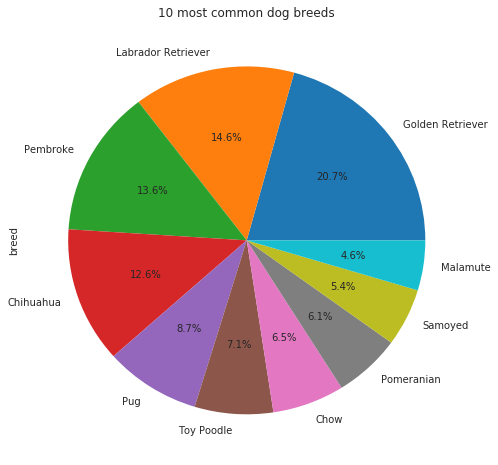

In [100]:

df_analyzing['breed'].value_counts()[:10].plot(kind='pie', figsize=(8,8),autopct='%1.1f%%', title="10 most common dog breeds");

In [101]:
df_analyzing['retweet_count'].nlargest(10)

728     74941
760     55798
301     42183
57      39370
105     31869
1360    30279
1418    29309
593     28322
132     27691
327     26583
Name: retweet_count, dtype: int64

In [102]:
mostpopbreed1=[]
for x in df_analyzing['retweet_count'].nlargest(10).index.values:
    mostpopbreed1.append(df_analyzing['breed'][x])

In [103]:
print(mostpopbreed1)

['Labrador Retriever', 'Eskimo Dog', 'Lakeland Terrier', 'English Springer', 'French Bulldog', 'Bedlington Terrier', 'Whippet', nan, 'Malamute', 'Cocker Spaniel']


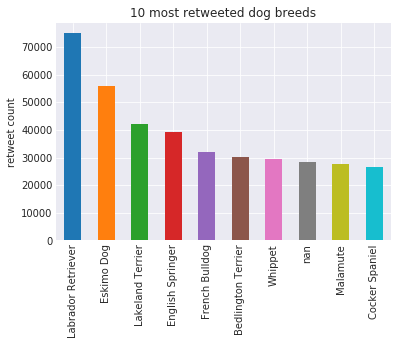

In [104]:
most_retweeted_breed = df_analyzing['retweet_count'].nlargest(10);
pdogs=most_retweeted_breed.plot(kind='bar',title='10 most retweeted dog breeds');
pdogs.set_xticklabels(mostpopbreed1);
pdogs.set_ylabel('retweet count');


In [105]:
df_analyzing['favorite_count'].nlargest(10)

728     151396
301     129384
105     113264
760     111921
57       96589
132      84077
91       76806
1360     76792
1418     72761
64       72381
Name: favorite_count, dtype: int64

In [106]:
mostpopbreed2=[]
for x in df_analyzing['favorite_count'].nlargest(10).index.values:
    mostpopbreed2.append(df_analyzing['breed'][x])
mostpopbreed2

['Labrador Retriever',
 'Lakeland Terrier',
 'French Bulldog',
 'Eskimo Dog',
 'English Springer',
 'Malamute',
 'Golden Retriever',
 'Bedlington Terrier',
 'Whippet',
 'Chesapeake Bay Retriever']

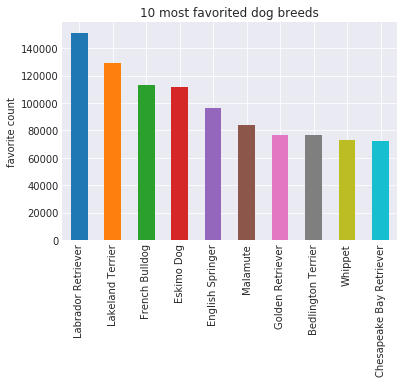

In [107]:
most_favorited_breed = df_analyzing['favorite_count'].nlargest(10);
pdogs=most_favorited_breed.plot(kind='bar',title='10 most favorited dog breeds');
pdogs.set_xticklabels(mostpopbreed2);
pdogs.set_ylabel('favorite count');

In [108]:
df_analyzing['rating_numerator'].nlargest(5)

679     1776
1649     420
475       75
517       27
1314      26
Name: rating_numerator, dtype: int64

In [109]:
df_analyzing.name.value_counts()

Charlie        10
Oliver         10
Cooper         10
Lucy            9
Winston         8
Sadie           8
Tucker          8
Penny           8
Toby            7
Daisy           7
Koda            6
Bella           6
Stanley         6
Lola            6
Jax             6
Leo             5
Buddy           5
Louis           5
Chester         5
Oscar           5
Oakley          4
Gus             4
Brody           4
Bo              4
Bear            4
Jerry           4
Dexter          4
Derek           4
Clark           4
Sophie          4
               ..
Lacy            1
Barclay         1
Kody            1
not             1
Brandonald      1
Patch           1
General         1
Sobe            1
Brady           1
Gustav          1
Jangle          1
Dwight          1
Raphael         1
Livvie          1
Lulu            1
Mauve           1
Filup           1
Lilah           1
Monkey          1
Evy             1
Lizzie          1
Emanuel         1
Ralphson        1
Tessa           1
Crumpet   

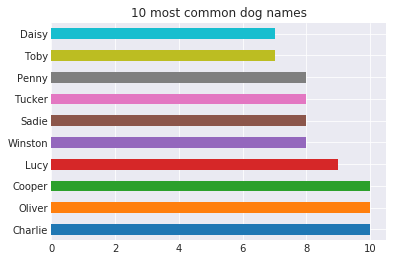

In [110]:
commonnames= df_analyzing.name.value_counts().nlargest(10)
cnames=commonnames.plot(kind='barh',title='10 most common dog names');